# Load data

In [49]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [14]:
df = pd.read_csv('IC2105.gz').iloc[1:]
df.index = pd.to_datetime(df['UpdateTime'])

df

,TradingDay,InstrumentID,LastPrice,PreSettlementPrice,PreClosePrice,PreOpenInterest,OpenPrice,HighestPrice,LowestPrice,Volume,...,LowerLimitPrice,UpdateTime,BidPrice1,BidVolume1,AskPrice1,AskVolume1,ActionDay,Type,Seqno,LocalTime
UpdateTime,,,,,,,,,,,,,,,,,,,,,
2021-05-14 09:29:00.100,20210514,IC2105,6448.8,6429.0,6435.0,65360.0,6448.8,6448.8,6448.8,148,...,5786.2,2021-05-14 09:29:00.100000,6448.8,4,6449.0,10,20210514,0,2,2021-05-14 09:29:00.246680
2021-05-14 09:30:00.100,20210514,IC2105,6451.4,6429.0,6435.0,65360.0,6448.8,6451.4,6448.8,176,...,5786.2,2021-05-14 09:30:00.100000,6451.2,1,6451.4,1,20210514,1,3,2021-05-14 09:30:00.123934
2021-05-14 09:30:00.600,20210514,IC2105,6451.6,6429.0,6435.0,65360.0,6448.8,6453.6,6448.8,210,...,5786.2,2021-05-14 09:30:00.600000,6453.4,1,6453.6,1,20210514,4,4,2021-05-14 09:30:00.644171
2021-05-14 09:30:01.100,20210514,IC2105,6453.2,6429.0,6435.0,65360.0,6448.8,6453.8,6448.8,241,...,5786.2,2021-05-14 09:30:01.100000,6453.0,5,6453.2,1,20210514,9,5,2021-05-14 09:30:01.319139
2021-05-14 09:30:01.600,20210514,IC2105,6452.4,6429.0,6435.0,65360.0,6448.8,6453.8,6448.8,261,...,5786.2,2021-05-14 09:30:01.600000,6451.2,10,6452.4,8,20210514,9,6,2021-05-14 09:30:01.615757
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-14 14:59:59.600,20210514,IC2105,6545.2,6429.0,6435.0,65360.0,6448.8,6546.0,6416.0,54135,...,5786.2,2021-05-14 14:59:59.600000,6545.2,2,6546.0,1,20210514,7,26553,2021-05-14 14:59:59.766838
2021-05-14 15:00:00.100,20210514,IC2105,6545.2,6429.0,6435.0,65360.0,6448.8,6546.0,6416.0,54137,...,5786.2,2021-05-14 15:00:00.100000,6545.0,6,6546.0,1,20210514,8,26554,2021-05-14 15:00:00.107204
2021-05-14 15:27:13.100,20210514,IC2105,6545.2,6429.0,6435.0,65360.0,6448.8,6546.0,6416.0,54137,...,5786.2,2021-05-14 15:27:13.100000,6545.0,6,6546.0,1,20210514,0,26555,2021-05-14 15:27:13.207256


In [16]:
df.columns

Index(['TradingDay', 'InstrumentID', 'LastPrice', 'PreSettlementPrice',
       'PreClosePrice', 'PreOpenInterest', 'OpenPrice', 'HighestPrice',
       'LowestPrice', 'Volume', 'Turnover', 'OpenInterest', 'ClosePrice',
       'SettlementPrice', 'UpperLimitPrice', 'LowerLimitPrice', 'UpdateTime',
       'BidPrice1', 'BidVolume1', 'AskPrice1', 'AskVolume1', 'ActionDay',
       'Type', 'Seqno', 'LocalTime'],
      dtype='object')

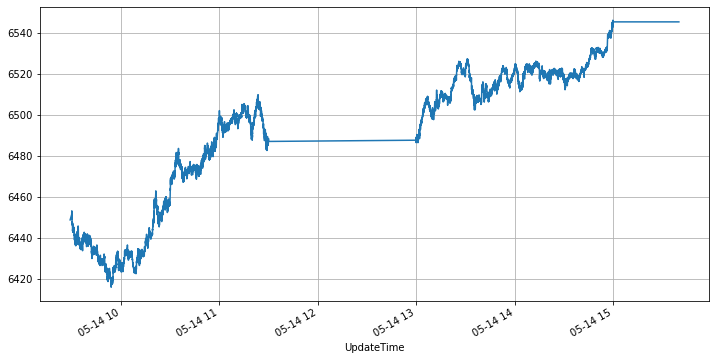

In [20]:
df['LastPrice'].plot(figsize=(12,6))
plt.grid(True)

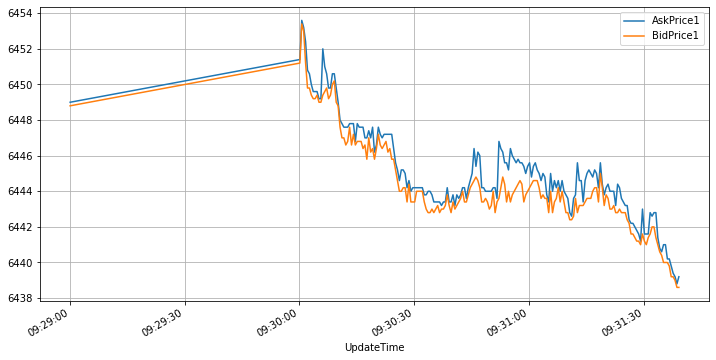

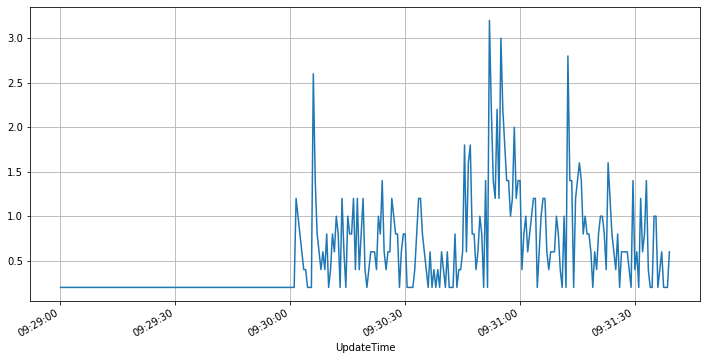

In [36]:
df[['AskPrice1', 'BidPrice1']].iloc[:200,:].plot(figsize=(12,6))
plt.grid(True)

# spread
plt.figure()
(df['AskPrice1'] - df['BidPrice1']).iloc[:200].plot(figsize=(12,6))
plt.grid(True)

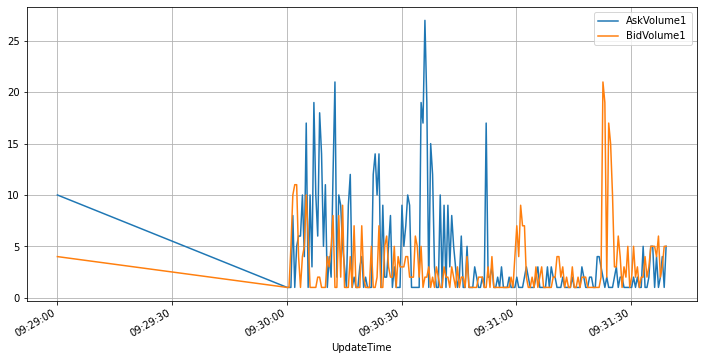

In [27]:
df[['AskVolume1', 'BidVolume1']].iloc[:200,:].plot(figsize=(12,6))
plt.grid(True)

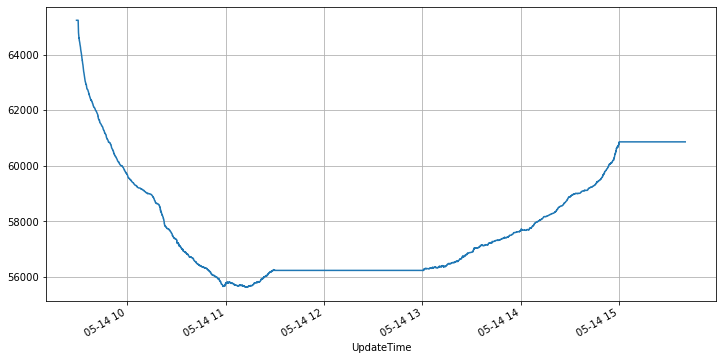

In [29]:
df['OpenInterest'].plot(figsize=(12,6))
plt.grid(True)

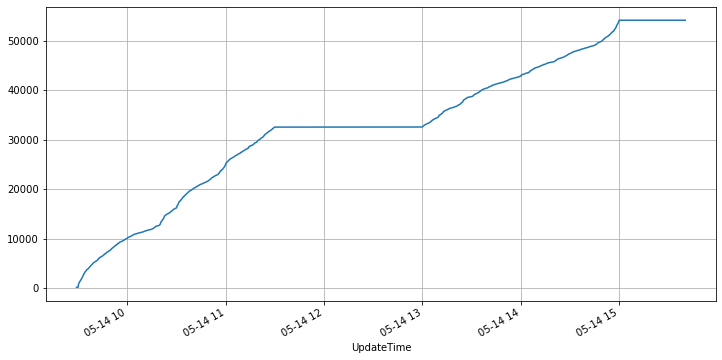

In [30]:
df['Volume'].plot(figsize=(12,6))
plt.grid(True)

# Features

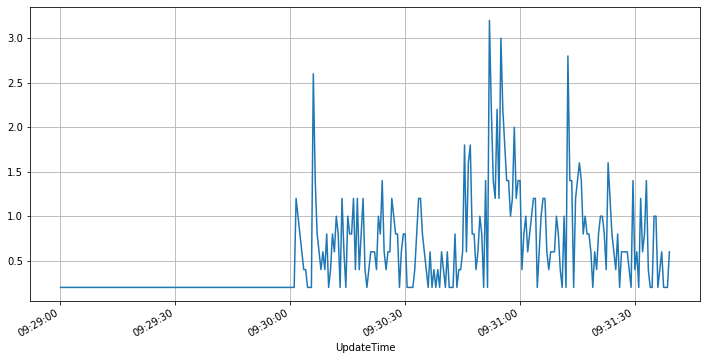

In [38]:
# spread

spread = df['AskPrice1'] - df['BidPrice1']
plt.figure()
spread.iloc[:200].plot(figsize=(12,6))
plt.grid(True)

In [142]:
# mid price, mid price returns

mid_price = (df['AskPrice1'] + df['BidPrice1'])/2

ret_10 = mid_price.pct_change(10).fillna(0)
ret_20 = mid_price.pct_change(20).fillna(0)
ret_30 = mid_price.pct_change(30).fillna(0)
ret_60 = mid_price.pct_change(60).fillna(0)

forward_ret_5 = mid_price.pct_change(5).shift(-5)
forward_ret_30 = mid_price.pct_change(30).shift(-30)
forward_ret_60 = mid_price.pct_change(60).shift(-60)

In [143]:
# order imbalance, order imabalance ratio

oi = df['AskVolume1'] - df['BidVolume1']
oi_ratio = (df['AskVolume1'] - df['BidVolume1']) / (df['AskVolume1'] + df['BidVolume1'])
oi_ratio_avg = oi_ratio.rolling(30).mean()

# Model

In [144]:
def get_bkt_result(position, price, slippage=0):
    
    pnl = (position * price.diff().shift(-1)).fillna(0) - position.diff().abs().fillna(0) * price * slippage

    bkt = pd.DataFrame()
    bkt['price'] = price
    bkt['price_diff'] = price.diff().shift(-1)
    bkt['position'] = position
    bkt['pnl'] = pnl
    bkt['cumpnl'] = pnl.cumsum()
    bkt.index = pd.to_datetime(bkt.index)
    bkt['date'] = bkt.index.date

    return bkt


In [145]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

In [146]:
X = pd.concat([ret_10, ret_20, ret_60, oi_ratio_avg], axis=1).fillna(0)
# y = forward_ret_30.fillna(0)
y = forward_ret_5.fillna(0)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.5, random_state=42)

## Regression

In [147]:
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_train, y_train)

0.002730824777290475

In [148]:
reg.score(X_test, y_test)

0.002033480818845357

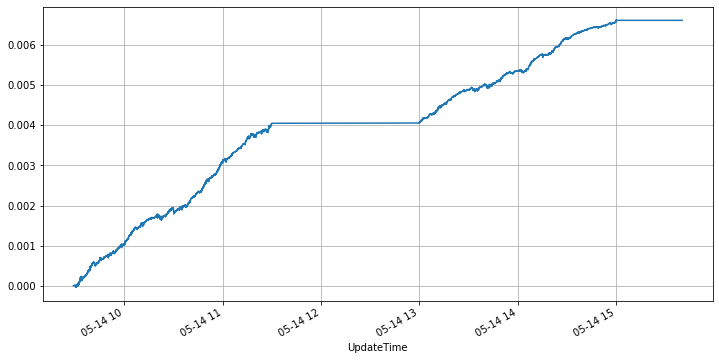

In [149]:
y_pred = pd.Series(reg.predict(X),index=mid_price.index)
bkt_result = get_bkt_result(y_pred, mid_price, slippage=0)

bkt_result['cumpnl'].plot(figsize=(12,6))
plt.grid(True)

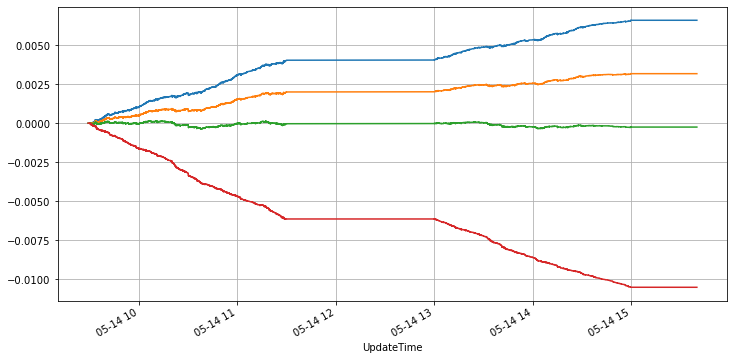

In [150]:

plt.figure(figsize=(12,6))

for slippage in [0, 0.00001, 0.00002, 0.00005]:
    y_pred = pd.Series(reg.predict(X),index=mid_price.index)
    bkt_result = get_bkt_result(y_pred, mid_price, slippage=slippage)
    bkt_result['cumpnl'].plot()
plt.grid(True)

# 3.2 Ridge

In [151]:
reg = Ridge(alpha=0.01).fit(X_train, y_train)
reg.score(X_train, y_train)

0.0008191857642848577

In [152]:
reg.score(X_test, y_test)

0.0006399306068316513

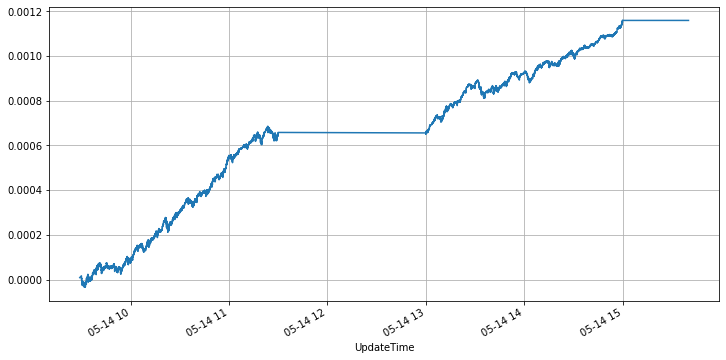

In [153]:
y_pred = pd.Series(reg.predict(X),index=mid_price.index)
bkt_result = get_bkt_result(y_pred, mid_price, slippage=0)

bkt_result['cumpnl'].plot(figsize=(12,6))
plt.grid(True)

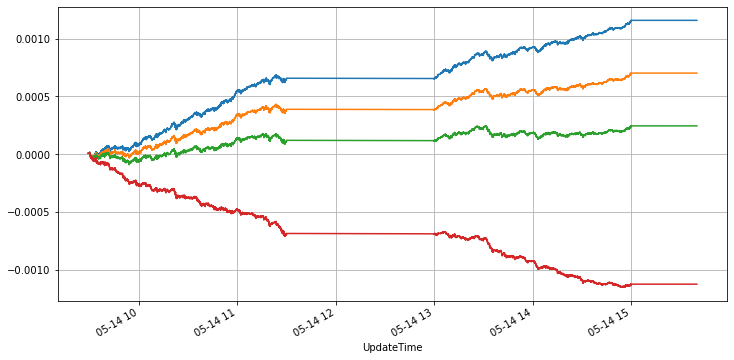

In [154]:

plt.figure(figsize=(12,6))

for slippage in [0, 0.00001, 0.00002, 0.00005]:
    y_pred = pd.Series(reg.predict(X),index=mid_price.index)
    bkt_result = get_bkt_result(y_pred, mid_price, slippage=slippage)
    bkt_result['cumpnl'].plot()
plt.grid(True)

## Random Forrest

In [156]:
reg = RandomForestRegressor(max_depth=2, random_state=0).fit(X_train, y_train)
reg.score(X_train, y_train)

0.009347328966818447

In [157]:
reg.score(X_test, y_test)

0.0036125075681857632

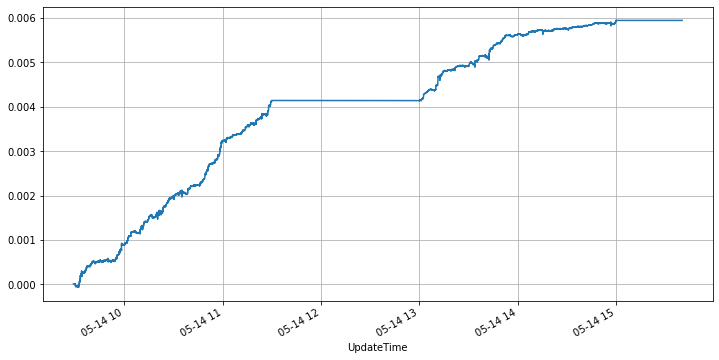

In [158]:
y_pred = pd.Series(reg.predict(X),index=mid_price.index)
bkt_result = get_bkt_result(y_pred, mid_price, slippage=0)

bkt_result['cumpnl'].plot(figsize=(12,6))
plt.grid(True)

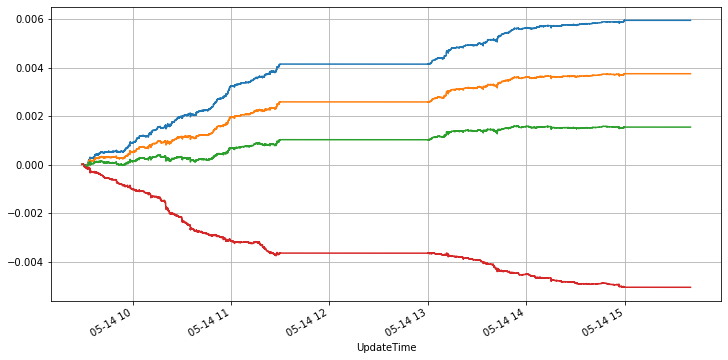

In [159]:
plt.figure(figsize=(12,6))

for slippage in [0, 0.00001, 0.00002, 0.00005]:
    y_pred = pd.Series(reg.predict(X),index=mid_price.index)
    bkt_result = get_bkt_result(y_pred, mid_price, slippage=slippage)
    bkt_result['cumpnl'].plot()
plt.grid(True)